In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

## Source: https://notebook.community/mspieg/dynamical-systems/Bifurcations

## Helpers

In [4]:
def bifurcation_plot(f,f_x,r,x,rlabel='r'):
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x)
        f_x(r,x):  partial derivative of f with respect to x
        r       :  numpy array giving r coordinates of domain
        x       :  numpy array giving x coordinates of domain
        rlabel  :  string for x axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    R,X = numpy.meshgrid(r,x)
    plt.figure()
    CS = plt.contour(R,X,f(R,X),[0],colors='k')
    plt.clf()
    
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        mask = numpy.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.
        
        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable],'b')
        plt.plot(vr[unstable],vx[unstable],'b--')
        
    plt.xlabel('parameter {0}'.format(rlabel))
    plt.ylabel('x')
    plt.legend(('stable','unstable'),loc='best')
    plt.xlim(r[0],r[-1])
    plt.ylim(x[0],x[-1])

## Example 1

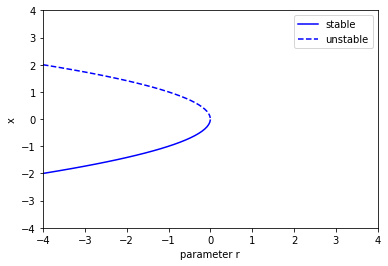

In [17]:
f = lambda r,x: r + x*x
f_x = lambda r,x: 2.*x

x = numpy.linspace(-4,4,100)
r = numpy.linspace(-4,4,100)

bifurcation_plot(f,f_x,r,x)

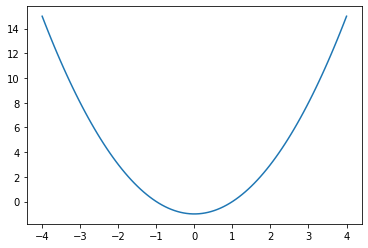

In [23]:
#simple function plot
x = numpy.linspace(-4,4,100)
r_fix=-1
y=f(r_fix, x)

plt.plot(x, y)

In [13]:
r=-1
x=-2
f(r, x)

3

In [14]:
r=-1
x=2
f(r, x)

3

In [15]:
r=1
x=2
f(r, x)

5

In [16]:
r=1
x=-2
f(r, x)

5

## Example #2: Logistic equation with constant harvesting

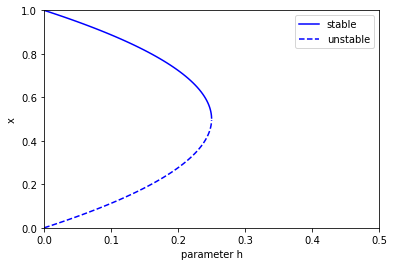

In [6]:
f = lambda h,x: x*(1-x) - h
f_x = lambda h,x: 1. - 2.*x

x = numpy.linspace(0,1.,100)
h = numpy.linspace(0,.5,100)

bifurcation_plot(f,f_x,h,x,rlabel='h')

## Example #3: transcritical bifurcation

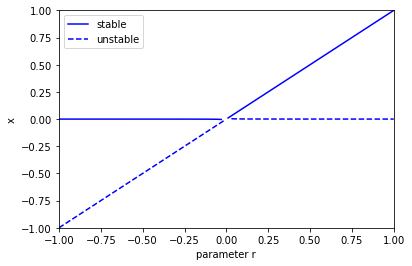

In [24]:
f = lambda r,x: r*x -  x*x
f_x = lambda r,x: r - 2.*x

x = numpy.linspace(-1.,1.,100)
r = numpy.linspace(-1.,1.,100)

bifurcation_plot(f,f_x,r,x)

## Example #4 super-critical pitchfork bifurcation

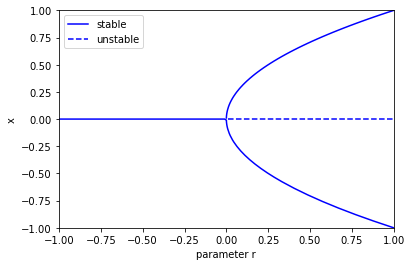

In [25]:
f = lambda r,x: r*x -  x**3
f_x = lambda r,x: r - 3.*x**2

x = numpy.linspace(-1.,1.,100)
r = numpy.linspace(-1.,1.,100)

bifurcation_plot(f,f_x,r,x)

## Example #4 sub-critical pitchfork bifurcation

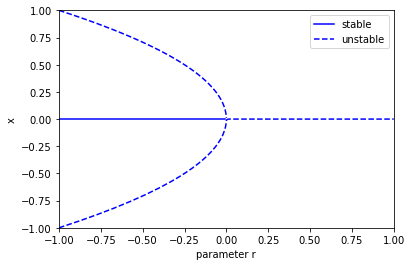

In [26]:
f = lambda r,x: r*x +  x**3
f_x = lambda r,x: r + 3.*x**2

x = numpy.linspace(-1.,1.,100)
r = numpy.linspace(-1.,1.,100)

bifurcation_plot(f,f_x,r,x)

## Example #6 subcritical pitchfork bifurcation with stabilization

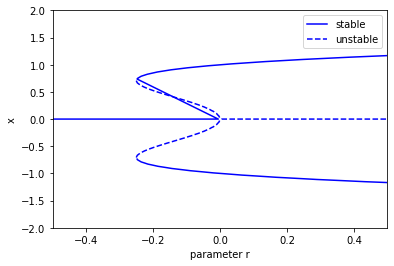

In [27]:
f = lambda r,x: r*x +  x**3 - x**5
f_x = lambda r,x: r + 3.*x**2 -5.*x**4

x = numpy.linspace(-2.,2.,100)
r = numpy.linspace(-.5,.5,100)

bifurcation_plot(f,f_x,r,x)

In [28]:
#FIXME: this plot needs to mask out the spurious stable branch which is a plotting error

#And now you can play with your own function

In [30]:
# f = lambda r,x: # < your function here >
# f_x = lambda r,x: # < your derivative here >

# # Adjust your domain and resolution
# x = numpy.linspace(-10.,10.,100)
# r = numpy.linspace(-10.,10.,100)

# #plot and pray (and watch out for glitches)
# bifurcation_plot(f,f_x,r,x)

In [ ]:
f = lambda r,x: # < your function here >
f_x = lambda r,x: # < your derivative here >

# Adjust your domain and resolution
x = numpy.linspace(-10.,10.,100)
r = numpy.linspace(-10.,10.,100)

#plot and pray (and watch out for glitches)
bifurcation_plot(f,f_x,r,x)